# PY1010-1-24H-prosjektoppgave
>Dette er besvarelsen på den ferdigdefinerte oppgaven.

>Oppgaven består av 6 deloppgaver, hvor minst 5 av de 6 deloppgavene skal besvares. 

>Oppgaven er beskrevet i dokumentet "prosjektoppgave.pdf"

>Filen ‘support_uke_24.xlsx’ inneholder alle data

>Oppgaven er løst i hver sin kodeblokk.

>Disse må kjøres i rekkefølge da data fra en tidligere blokk gjenbrukes senere

## Del a) 
Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’
. Merk:
filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

In [78]:
# Importere data fra support_uke_24.xlsx og lagre i arrays

import pandas as pd

# Leser data fra fil
data = pd.read_excel("support_uke_24.xlsx")

# Lagrer kolonner i egne arrays
u_dag = data['Ukedag'].values
kl_slett = data['Klokkeslett'].values
varighet = data['Varighet'].values
score = data['Tilfredshet'].values

#  Koden for verifisering av antall linjer lest inn: print(len(u_dag))


## Del b) 
Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram).

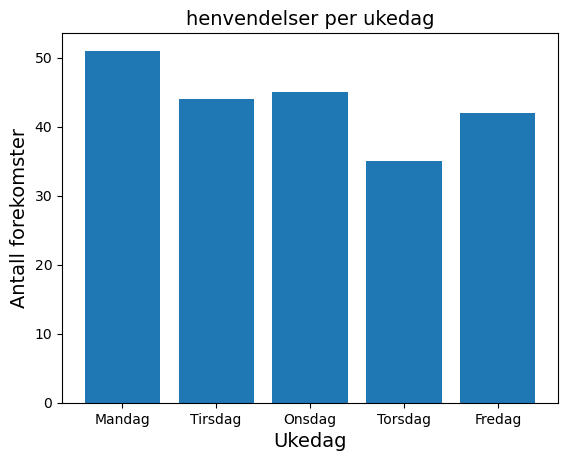

In [80]:
# Antall henvendelser visualisert i Søylediagram

import numpy as np
import matplotlib.pyplot as plt

# Henter ut alle unike dager i datasett, med indeksene de har i datasettet
unike_dager, indeks = np.unique(u_dag, return_index=True)
unike_dager = unike_dager[np.argsort(indeks)]               # Bevarer original rekkefølge

# Teller antall henvendelser for hver unik dag
antall_forekomster = np.array([np.sum(u_dag == dag) for dag in unike_dager])

# Viser antall henvendelser for hver unik dag i et Søylediagram
plt.bar(unike_dager, antall_forekomster)
plt.title('henvendelser per ukedag', fontsize=14)
plt.xlabel('Ukedag', fontsize=14)
plt.ylabel('Antall forekomster', fontsize=14)
plt.show()


## Del c) 
Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ tekst.

In [82]:
# Skrive ut korteste og lengste samtaletid i uke 24. kilde variabel "varighet"

# Finne indeks for korteste og lengste samtaletid
min_indeks = varighet.argmin()
maks_indeks = varighet.argmax()

# Skrive ut korteste og lengste samtaletid, med forklaring
print("Korteste samtaletid i uke 24 var:",  varighet[min_indeks], " (format tt:mm:ss) ")
print("Lengste samtaletid i uke 24 var:", varighet[maks_indeks], " (format tt:mm:ss) ")



Korteste samtaletid i uke 24 var: 00:00:59  (format tt:mm:ss) 
Lengste samtaletid i uke 24 var: 00:11:28  (format tt:mm:ss) 


## Del d) 
KREVENDE: Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
henvendelser i uke 24.

In [84]:
# Regne ut gjennomsnittlig samtaletid i uke 24. kilde variabel "varighet"

# Opprette funksjon for å konvertere en tid fra format tt:mm:ss til sekunder.
def konverter_tid_til_sekunder(tid):  
    h, m, s = tid.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

# Opprette funksjon for å konvertere sekunder til format tt:mm:ss
def konverter_sekunder_til_tid(sekunder):  
    h = sekunder // 3600
    m = (sekunder % 3600) // 60
    s = sekunder % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'


# Lager en oversikt over samtale varighetene konvsertert til sekunder
varighet_sekunder = np.array([konverter_tid_til_sekunder(tid) for tid in varighet])

# Beregner gjennomsnittlig varighet i sekunder
gjennomsnitt_varighet_sekunder = np.mean(varighet_sekunder)

# Konverter gjennomsnittet tilbake til tt:mm:ss format
gjennomsnitt_varighet = konverter_sekunder_til_tid(gjennomsnitt_varighet_sekunder)

# Skriver ut gjennomsnnittlig varighet av en henvendelse 
print(f"Gjennomsnittlig samtaletid: {gjennomsnitt_varighet}", " (format tt:mm:ss) ")



Gjennomsnittlig samtaletid: 00:06:40  (format tt:mm:ss) 


## Del e) 
Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).

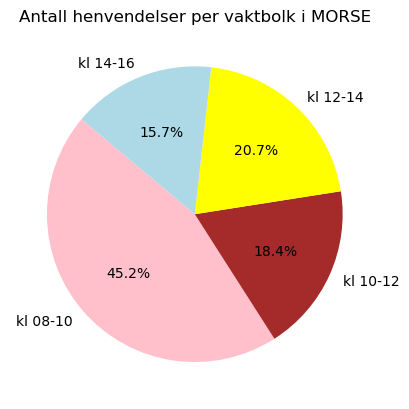

In [86]:
# Beregne antall henvendelser innen gitte tidsbolker. kilde variabel "kl_slett"
# Tolker oppgaven slik at vi skal presentere supportvaktene uavhengig av ukedag
# Beregner på grunnlag av starttidspunkt, og tar ikke høyde for om henvendelsen går over i neste tidsbolker

# Lager en funksjon som konverterer fra tt:mm:ss til tt
def konverter__til_start_time(start_tid):  
    h, m, s = start_tid.split(':')
    return int(h)

# Definerer 2-timers bolkene
vakt_bolker = ["kl 08-10", "kl 10-12", "kl 12-14", "kl 14-16"]

# Lager en oversikt med med kun start-time (fra tt:mm:ss)
start_time = np.array([konverter__til_start_time(start_tid) for start_tid in kl_slett])

# Telle antall henvndelser innen de gitte bolkene (legge inn i array)
aatte_ti = np.count_nonzero( (8 <= start_time) & (start_time < 10) )
ti_tolv = np.count_nonzero( (10 <= start_time) & (start_time < 12) )
tolv_to = np.count_nonzero( (12 <= start_time) & (start_time < 14) )
to_fire = np.count_nonzero( (14 <= start_time) & (start_time < 16) )
henvendelser_per_bolk = [aatte_ti, ti_tolv, tolv_to, to_fire ]

# Visualiser antall henvendelser i 2-timers bolker ved bruk av Sektordiagram
colors = ['pink', 'brown', 'yellow', 'lightblue'] 
plt.title('Antall henvendelser per vaktbolk i MORSE')
plt.pie(henvendelser_per_bolk, labels=vakt_bolker, colors=colors, autopct='%1.1f%%', startangle=140 )
plt.show()

## Del f) 
Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og
10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net
Promoter Score).
NPS-systemet er konstruert på følgende måte:
Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre).
Score 7-8 oppfattes som et nøytralt svar.
Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).
Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus
prosentandelen negative kunder. Ved en formel kan dette gis slik:
NPS = % positive kunder - % negative kunder
Kilde: https://www.blueprnt.com/2018/09/17/net-promoter-score/
Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

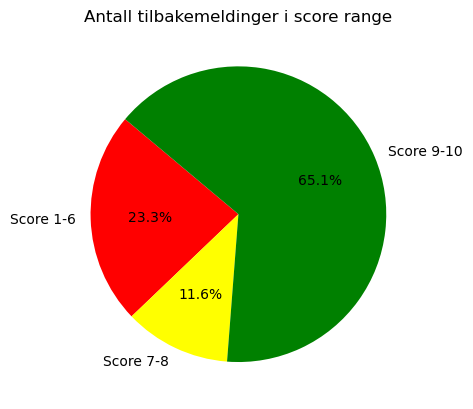

Beregnet MPS: Positive  65.1 % - Negative  23.3 % =   41.8 



In [88]:
# Beregne NPS. kilde variabel "score"

# Teller antall tilbakemeldinger pr score verdi fra 1 til 10
score_verdi, tilbakemeldinger_per_score = np.unique(score[~np.isnan(score)], return_counts=True)

# Finner totalt antall tilbakemeldinger for å kunne regne ut NPS
tilbakemeldinger_totalt = tilbakemeldinger_per_score.sum()

# Finne antall negative tilbakemeldinger (score 1-6), som prosent av alle tilbakemeldinger
negative_indeks = np.nonzero((1 <= score_verdi) & (score_verdi <= 6))
negative = tilbakemeldinger_per_score[negative_indeks].sum()

# Finne antall positive tilbakemeldinger(score 9-10), som prosent av alle tilbakemeldinger
positive_indeks = np.nonzero((9 <= score_verdi) & (score_verdi <= 10))
positive = tilbakemeldinger_per_score[positive_indeks].sum()

# Beregne prosentandel positive og negative tilbakemeldinger
prosent_negative = round(negative / tilbakemeldinger_totalt * 100,1)
prosent_positive = round(positive / tilbakemeldinger_totalt * 100,1)


# Beregne NPS = % positive tilbakemeldinger - % negative tilbakemeldinger
verdi_NPS = prosent_positive - prosent_negative


# Visualiser antall tilbakemelding i score kategorier i et kakediagram
colors = ['red', 'yellow', 'green'] 
plt.title('Antall tilbakemeldinger i score range')
score_grupper = ["Score 1-6", "Score 7-8", "Score 9-10"]
tilbakemelding_scoregruppe = [negative, tilbakemeldinger_totalt - negative - positive, positive ]
plt.pie(tilbakemelding_scoregruppe, labels=score_grupper, colors=colors, autopct='%1.1f%%', startangle=140 )
plt.show()

# Skriv ut NPS verdi til skjerm (med forklaring)
print("Beregnet MPS: Positive ", prosent_positive, 
      "% - Negative ", prosent_negative, "% =  ", verdi_NPS, "\n" )